### Title: Connecting Conversation to Care – Positive AI
* Presented By: Sruthi Puthiyandy
* Supervised By: Prof. Dr. Yasin Ceren

AI is the simulation of human intelligence by machines, enabling them to perform digital tasks like learning, reasoning, and problem solving. Machine learning is the subset of AI that allows systems to automatically learn and improve from experiences without being explicitly programmed. By analyzing patterns in data, ML models can make predictions, detect anomalies, and support decision-making – making it an ideal tool for early detection and intervention in mental health care. 
Mental health encompasses our emotional, psychological, and social well-being. It influences how we think, feel, and behave, and plays a role in how we manage stress, relate to others, and make choices. Mental health is essential throughout all stages of life, from childhood and adolescence to adulthood.
Mental and physical health are equally crucial for overall well-being. For instance, mental health conditions such as depression can elevate the risk of developing physical health issues, including chronic conditions like diabetes, heart disease, and stroke. Conversely, the presence of long-lasting physical conditions can also contribute to mental health challenges.

# Vision
Psychology is a fascinating field of understanding the human mind. Without well-being, one can’t truly thrive. Therefore, it’s equally important to consider mental health alongside physical health. This project aims to implement an AI model capable of predicting whether an individual may be experiencing any kind of mental health disorder, enabling early intervention by psychologists through appropriate therapy or psychiatric. With rising cases of depression, bipolar disorder and other mental health disorders are increasing globally – Often influenced by lifestyle changes, social isolation and relationship difficulties. Timely detection is critical at the same time far beyond even for celebrities and highly famous and common man. A well-designed model could play a significant role in preventing suicide, promoting early treatment, and ultimately improving mental well-being.  
The vision is to empower people across the world by providing a tool that can identify symptoms through conversations and guide them immediately towards the proper professional help by alerting the medical providers. Let us channel the power of digital transformation for our own balancing and creating happier lives and nurturing creative healthy minds. 


## About Dataset
#### This dataset is collected from Keggle.com, it has a usability score of 10. And dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data. With a wide range of features, including sentiment analysis scores and psychological indicators, the dataset offers opportunities for developing predictive models to identify or predict mental health outcomes based on textual data. This can be useful for early intervention and support.

#### Brief description of each column:

* Timestamp: The date and time when the respondent submitted the survey.
* Gender: The respondent’s gender identity.
* Country: The country where the respondent resides.
* Occupation: The respondent’s job role or profession.
* self_employed: Indicates if the respondent is self-employed (Yes/No).
* family_history: Whether the respondent has a family history of mental illness (Yes/No).
* past_treatment: Whether the respondent has ever sought treatment for a mental health condition (Yes/No)
* Days_Indoors: How many days the respondent stayed indoors recently, possibly due to external stressors.
* Growing_Stress: Indicates if the respondent feels their stress levels are increasing.(Yes/No/Maybe)
* Changes_Habits: Reports any noticeable changes in habits or routines.(Yes/No/Maybe)
* Mental_Health_History: Indicates if the respondent has a past diagnosis or history of mental health issues. (Yes/No/Maybe)
* Mental_Disorder: Whether the respondent experiences sudden or frequent mood changes. (Low/Medium/High)
* Coping_Struggles: Whether the respondent struggles to cope with everyday stress or pressure.(Yes/No)
* Work_Interest: Level of interest or engagement the respondent has in their work.(Yes/No/Maybe)
* Social_Weakness: Difficulty in maintaining or engaging in social interactions.(Yes/No/Maybe)
* mental_health_interview: Whether the respondent interested to take a evaluation on the same. (Yes/No/Maybe)
* care_options: Awareness of available mental health care resources or options. (Yes/Not sure/No)

#### Project Environment setup:
*	Programming Language: Python 3.13.5
*	IDE: Visual Studio Code (VS Code)
*	Operating System: Windows 11 Pro
*	Processor: 12th Gen Intel® Core™ i5-1235U @ 1.30 GHz
*	Python Libraries : scikit-learn (sklearn), pandas, numpy, matplotlib, seaborn, streamlit (for local model deployment), imbalanced-learn


In [13]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset loading

In [14]:
data=pd.read_csv('MentalHealthDataset.csv')

In [4]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,past_treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mental_Disorder,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,14,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Checking dataset is Imbalanced or balanced
* Here we are designing a model to predict Mood_Swings
* Target has three values Medium, low and high - it's a multiclass clasifier
* Mental_Disorder - column is balanced 
* Total of 292364 data is available
* Shape : (292364, 17)
* Duplicates : 2313
* Null values : 5193
* Data type is int64 for one column and others are Objects
* timestamp is not useful to build the model - drop column timestamp

In [5]:
# Checking all the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   past_treatment           292364 non-null  object
 7   Days_Indoors             292364 non-null  int64 
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mental_Disorder          292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [6]:
# Duplicates should be removed
data.duplicated().sum()

np.int64(2313)

In [8]:
# Find the count of data with Mood_Swings = Medium, high, low
# data count is almost in equal scale - data is balanced
mood_counts = data['Mental_Disorder'].value_counts()
print(mood_counts)

Mental_Disorder
Medium    101064
Low        99834
High       91466
Name: count, dtype: int64


In [9]:
# checking all the count, frq and min values
# Gender is imbalanced 
data.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,292364,580,8/27/2014 11:43,2384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,292364,2,Male,239850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,292364,35,United States,171308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,292364,5,Housewife,66351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,287162,2,No,257994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,292364,2,No,176832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
past_treatment,292364,2,Yes,147606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days_Indoors,292364.0,NaN,NaN,NaN,39.950459,35.672193,-1.0,14.0,30.0,60.0,100.0
Growing_Stress,292364,3,Maybe,99985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Changes_Habits,292364,3,Yes,109523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Target is balanced

Class Counts:
 Mental_Disorder
Medium    101064
Low        99834
High       91466
Name: count, dtype: int64

Class Percentages:
 Mental_Disorder
Medium    34.57
Low       34.15
High      31.28
Name: proportion, dtype: float64


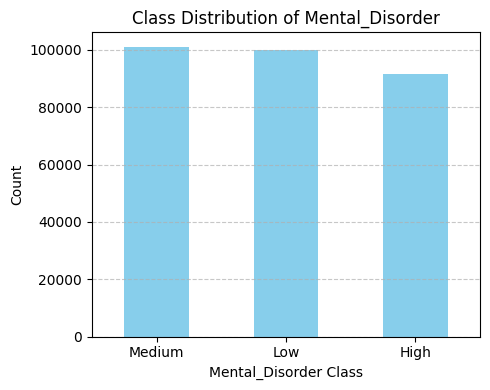

In [10]:
# Check class distribution
value_counts = data['Mental_Disorder'].value_counts()
percentages = data['Mental_Disorder'].value_counts(normalize=True) * 100

# Print counts and percentages
print("Class Counts:\n", value_counts)
print("\nClass Percentages:\n", percentages.round(2))

# Optional warning if imbalance is detected
min_pct = percentages.min()
max_pct = percentages.max()


# Plot the distribution
plt.figure(figsize=(5, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Mental_Disorder')
plt.xlabel('Mental_Disorder Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Major features are balanced, except few imbalance as shown in below. Data looks good.
*	Features: From the below graph observation are -
1.	Gender has imbalance – since ‘Male’ has dominating data distribution. Since it’s important but categorical we need to use OnehotEncoding and we will check if it leads bias/dominates prediction later. We can keep this as it is.
2.	Self_employment is 90% No and 10% Yes. Kept it with proper encoding. Let’s see if it balances and model predicts as without domination.
3.	Mental_health_interview has 75% no, 15% may be, 10% yes – this is corelated with target so we can keep it, since class imbalance doesn’t much effect the prediction.
4.	Country – has high imbalance. USA makes 50%+ of the data – so the model can become biased towards patterns from that country. Many countries have few rows, which implies noise. We need  to deal with this. For that Group rare countries as other, then use target encoding. Country is strongly related to the country and their culture target mean encoding will help to handle.  
5.	Days_Indoors: is in numerical form with different scales from -1 to 200. We need to scale it later. 
6.	For Self_employed – column has missing values. To deal with it – first need to fill it with nan values, since it can’t be able to manage null values and can through error. And then we can use an imputer to fill the value. Decided to use OrdinalEncoder() and then impute with iterativeImputation().
7.	Other feature data are in labeled format we need to deal with it.


### Decided to deal with any data bias once after the model recall and accuracy identified at the end - and later change different preprocessing and data handling to get the better prediction.


C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\230349660.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\230349660.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\230349660.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, pa

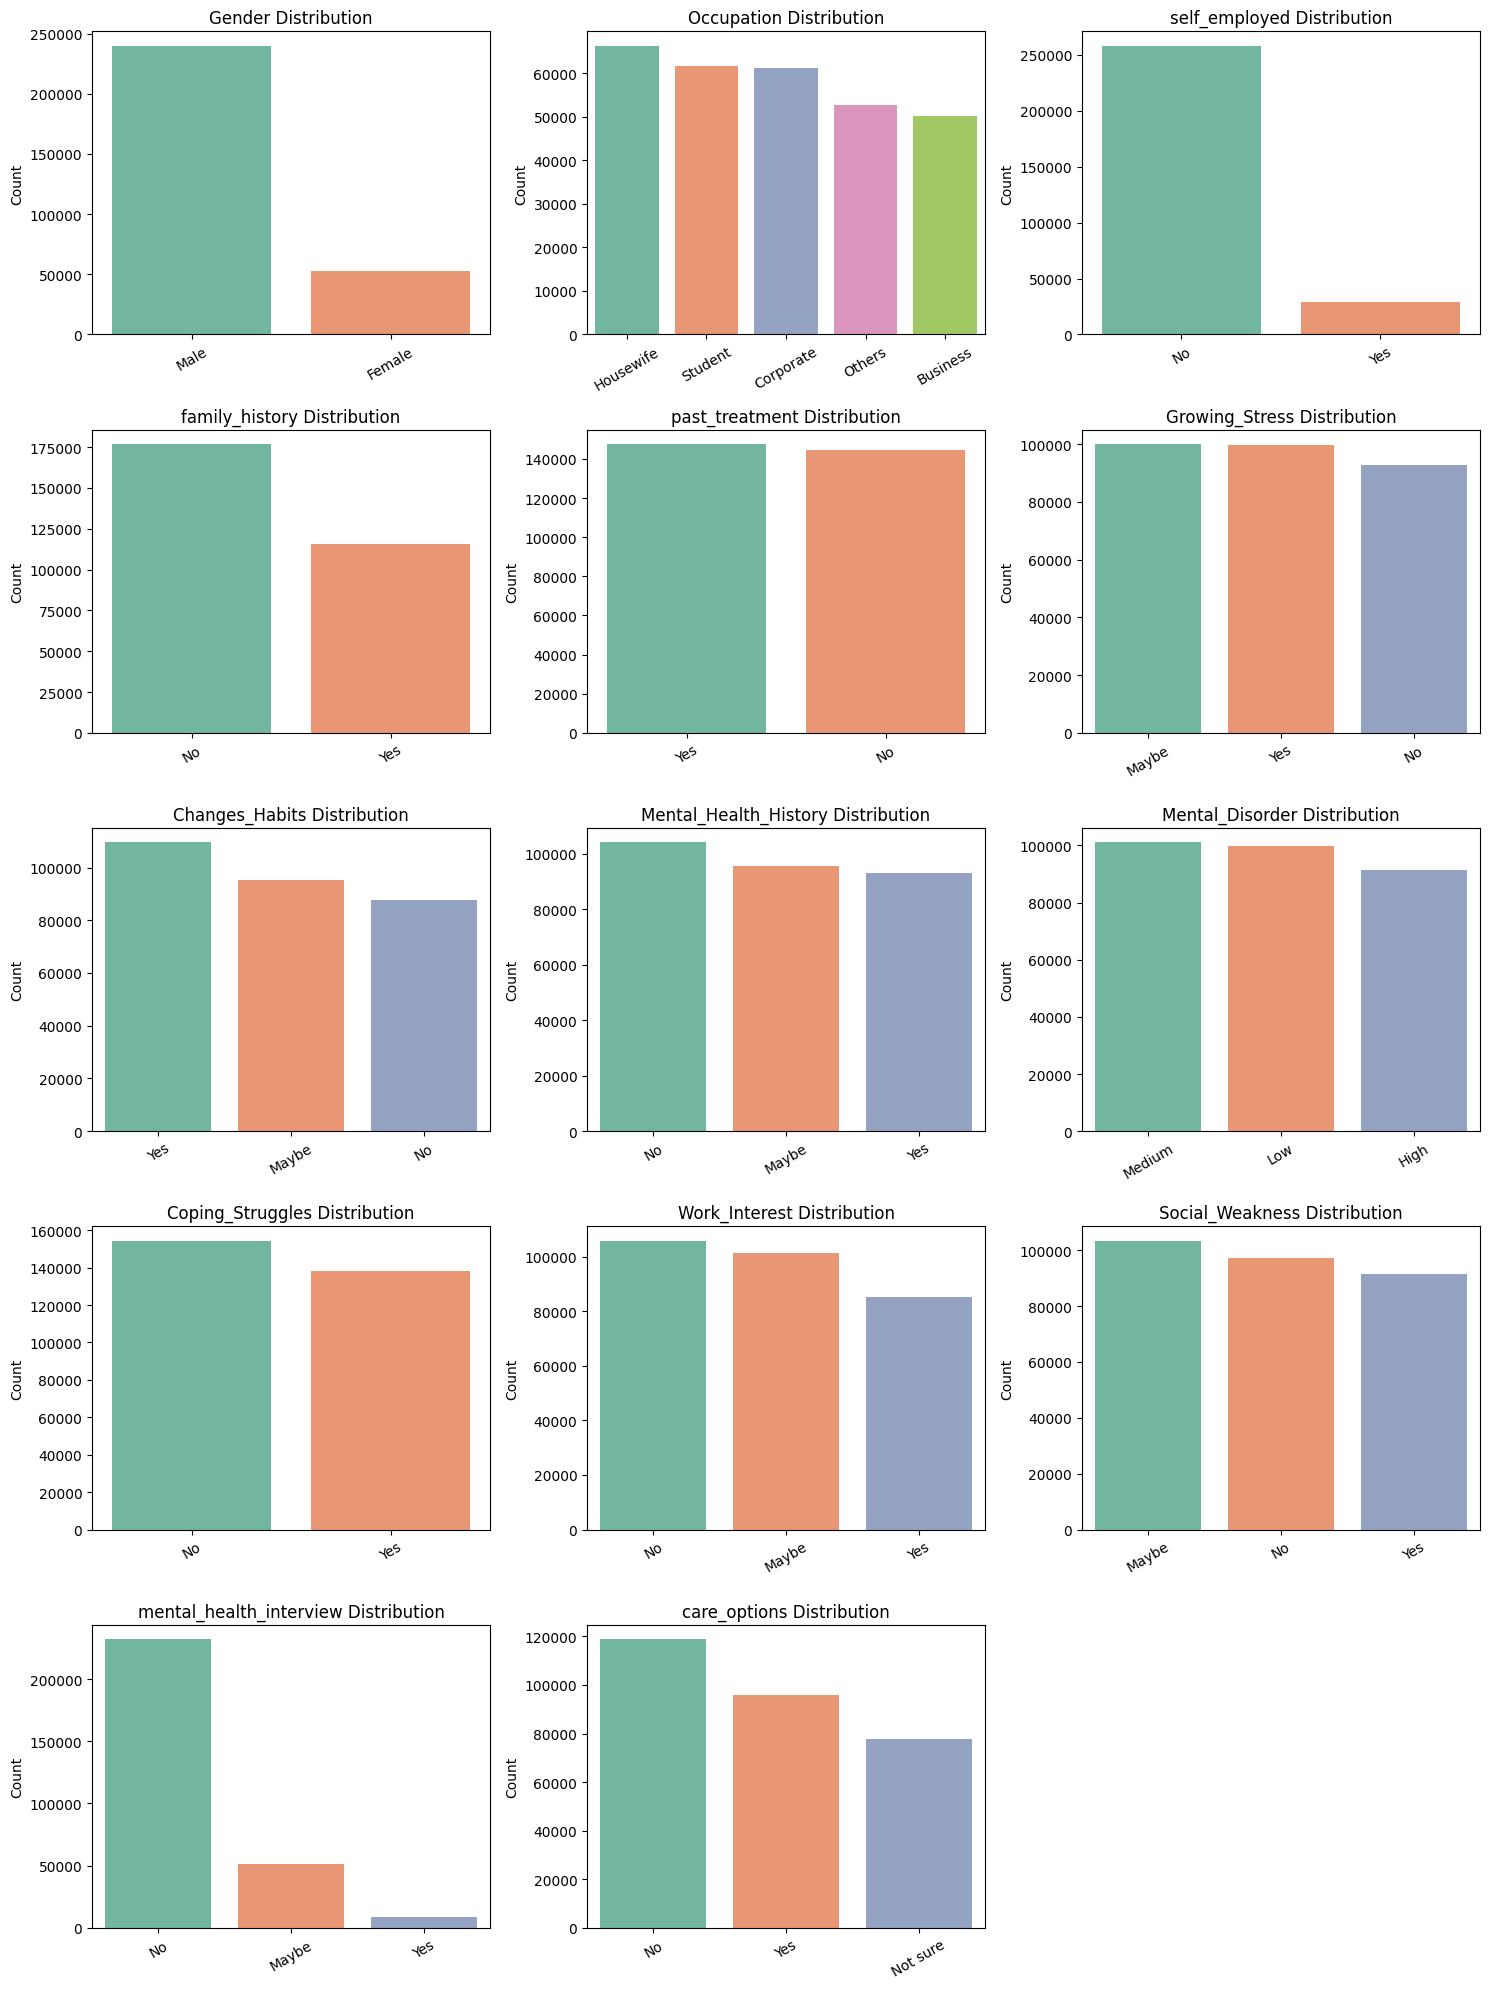

In [11]:
# Select categorical columns with ≤ 10 unique values
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        if data[col].nunique() <= 10:
            cat_cols.append(col)

# Number of plots per row
cols_per_row = 3
n = len(cat_cols)
rows = (n + cols_per_row - 1) // cols_per_row

# Set figure size
plt.figure(figsize=(cols_per_row * 5, rows * 4))

# Create subplots
for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Country has major imbalance, since it will effect on target variable - handle it
* Group rare countries to other category
* use suitable encoding - 
* OneHotEncode

C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\1651036464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Country', data=data, order=unique_countries, palette=colors)


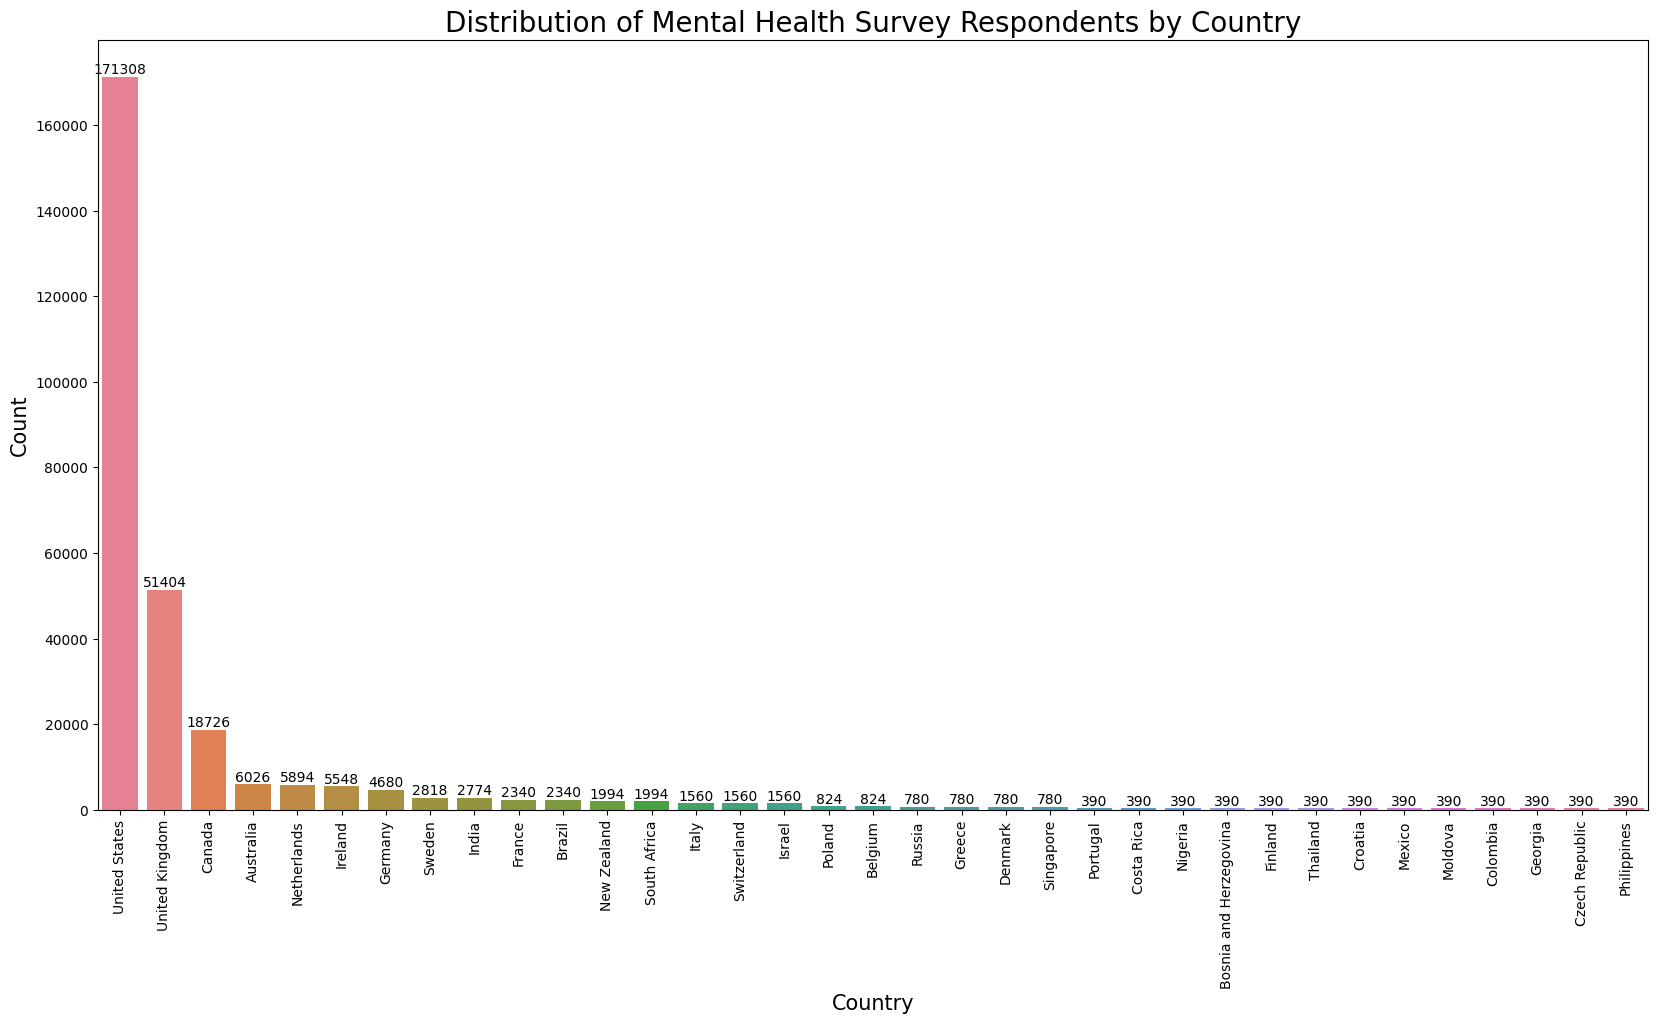

In [12]:
unique_countries = data['Country'].value_counts().index.tolist()
colors = sns.color_palette('husl', len(unique_countries))  # Or use 'Set3', 'tab20', etc.
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Country', data=data, order=unique_countries, palette=colors)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.set_title('Distribution of Mental Health Survey Respondents by Country', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(False)
plt.show()

C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\3820843487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Days_Indoors', data=data, order=unique_countries, palette=colors)


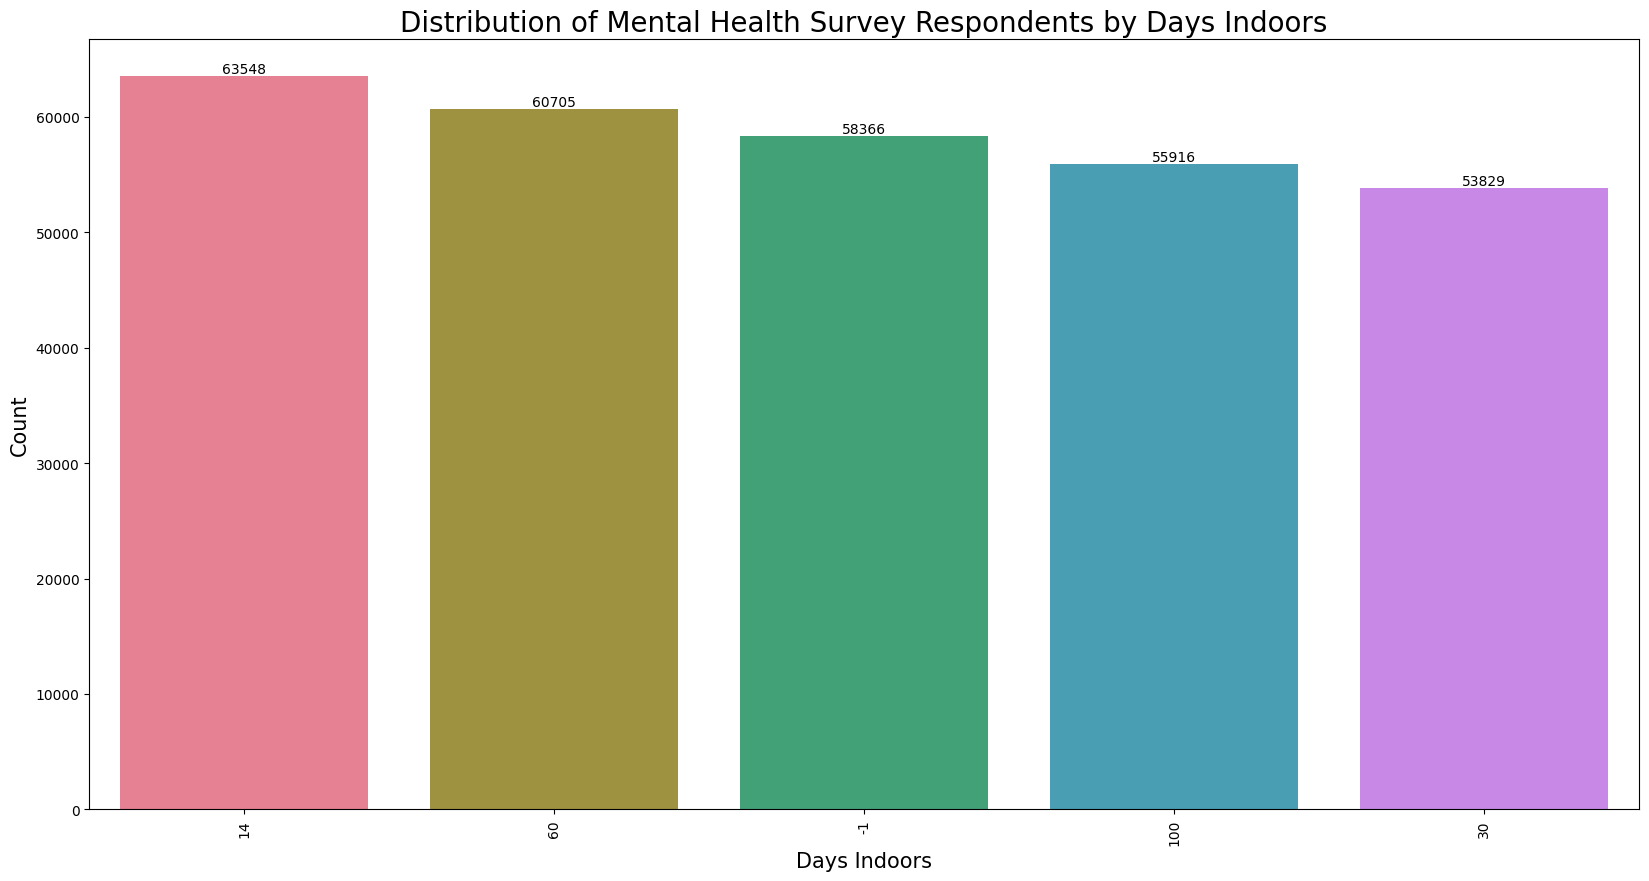

In [29]:
unique_countries = data['Days_Indoors'].value_counts().index.tolist()
colors = sns.color_palette('husl', len(unique_countries))  # Or use 'Set3', 'tab20', etc.
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Days_Indoors', data=data, order=unique_countries, palette=colors)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.set_title('Distribution of Mental Health Survey Respondents by Days Indoors', fontsize=20)
ax.set_xlabel('Days Indoors', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(False)
plt.show()

In [14]:
data.nunique()

Timestamp                  580
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
past_treatment               2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mental_Disorder              3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64

In [15]:
data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'past_treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mental_Disorder',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [16]:
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
past_treatment                0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mental_Disorder               0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

## Data cleaning
* IDentify duplicates
* Missing values: Identify for each columns any missing values and how many. Are values missing randomly or is there a pattern
* Identify if any value is not usable

In [15]:
# timestamp is not useful to build the model so droping the column
data.drop('Timestamp',axis=1,inplace=True)

In [16]:
# duplicated items we will remove since we do not need it
data.drop_duplicates(inplace=True)

In [19]:
#recheck the values
data.duplicated().sum()

np.int64(0)

### Seperate the features and target

In [17]:
# Will seperate the features and target
X=data.drop('Mental_Disorder',axis=1)

In [21]:
X.head()

,Gender,Country,Occupation,self_employed,family_history,past_treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,14,Yes,No,Yes,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,Yes


In [18]:
y=data['Mental_Disorder']

### Replace all null with nan
* As we know it's always better to replace all your -inf, +inf, 0, null, ? and NA or missing values with np.nan it's standardising the dataset so that models in scikit learn never throughs any error. So followed this best practice.

In [23]:
X.isnull().sum()

Gender                        0
Country                       0
Occupation                    0
self_employed              4803
family_history                0
past_treatment                0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [19]:
# Will replace all the Null values with numpy nan values to standardize and later during imputation we will handle it.
X.replace('null',np.nan,inplace=True)

In [25]:
X

,Gender,Country,Occupation,self_employed,family_history,past_treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,14,Yes,No,Yes,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,14,Yes,No,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292342,Male,Philippines,Business,No,No,No,30,No,Maybe,No,Yes,No,Maybe,No,No
292350,Male,United Kingdom,Business,No,Yes,Yes,30,No,Maybe,No,Yes,No,Maybe,Yes,Yes
292355,Male,Poland,Business,Yes,No,Yes,30,No,Maybe,No,Yes,No,Maybe,No,No
292359,Male,United States,Business,Yes,Yes,Yes,30,No,Maybe,No,Yes,No,Maybe,Maybe,Not sure


In [26]:
X.isnull().sum()

Gender                        0
Country                       0
Occupation                    0
self_employed              4803
family_history                0
past_treatment                0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

#### In the above case we handled 
* Duplicates : All the duplicates are dropped
* Null values: standardised with np.nan values and later we will impute with numerical values
* deleted timestamp 


## Split the training and test data before preprocessing to avoid data leakage

In [9]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imb

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

## Preprocessing and feature Engineering

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

### Dealing with all the Categorical value to encode it

#### Below columns have all the values labeled either yes, no, maybe so ordinalEncoder is the best choice

#### The dataset contains 35 countries - with significant skew 
* USA alone accounts 50%+ of the data - leads potential model bias
* Mitigation done by grouping countries based on similiar record counts into other1,other2,other3,other4
* Higher count countries like USA, UK, Canada are retained - to preserve predictive patterns while minimizing noise from rare category countries.

In [23]:
country_counts = X_train['Country'].value_counts()
print(country_counts)

Country
United States             20959
United Kingdom            14408
Canada                     9250
Australia                  3823
Germany                    3460
Netherlands                3161
Ireland                    3154
Sweden                     1954
Brazil                     1866
New Zealand                1616
India                      1606
South Africa               1291
Switzerland                1261
France                     1254
Italy                       941
Israel                      922
Poland                      678
Belgium                     668
Russia                      622
Singapore                   596
Greece                      329
Croatia                     325
Finland                     319
Mexico                      317
Moldova                     316
Georgia                     315
Czech Republic              314
Costa Rica                  312
Denmark                     310
Colombia                    309
Bosnia and Herzegovina      308


### Grouping of country

In [24]:
def group_by_frequency(val):
    count = country_counts.get(val, 0)
    if count >= 10000:
        return val  
    elif 4000<=count<15000:
        return 'Other 1'
    elif 1000 <= count < 4000:
        return 'Other2'
    elif 500 <= count < 1000:
        return 'Other3'
    else:
        return 'Other4'

In [25]:
X_train['Country'] = data['Country'].apply(group_by_frequency)

In [26]:
X_test['Country'] = data['Country'].apply(group_by_frequency)

In [34]:
X_test['Country'].value_counts()

Country
Other2            6035
United States     5252
United Kingdom    3634
Other 1           2347
Other4            1162
Other3            1115
Name: count, dtype: int64

In [35]:
X_train['Country'].value_counts()

Country
Other2            24446
United States     20959
United Kingdom    14408
Other 1            9250
Other4             4688
Other3             4427
Name: count, dtype: int64

C:\Users\sruth\AppData\Local\Temp\ipykernel_46840\3090756081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Country', data=X_train, order=unique_countries, palette=colors)


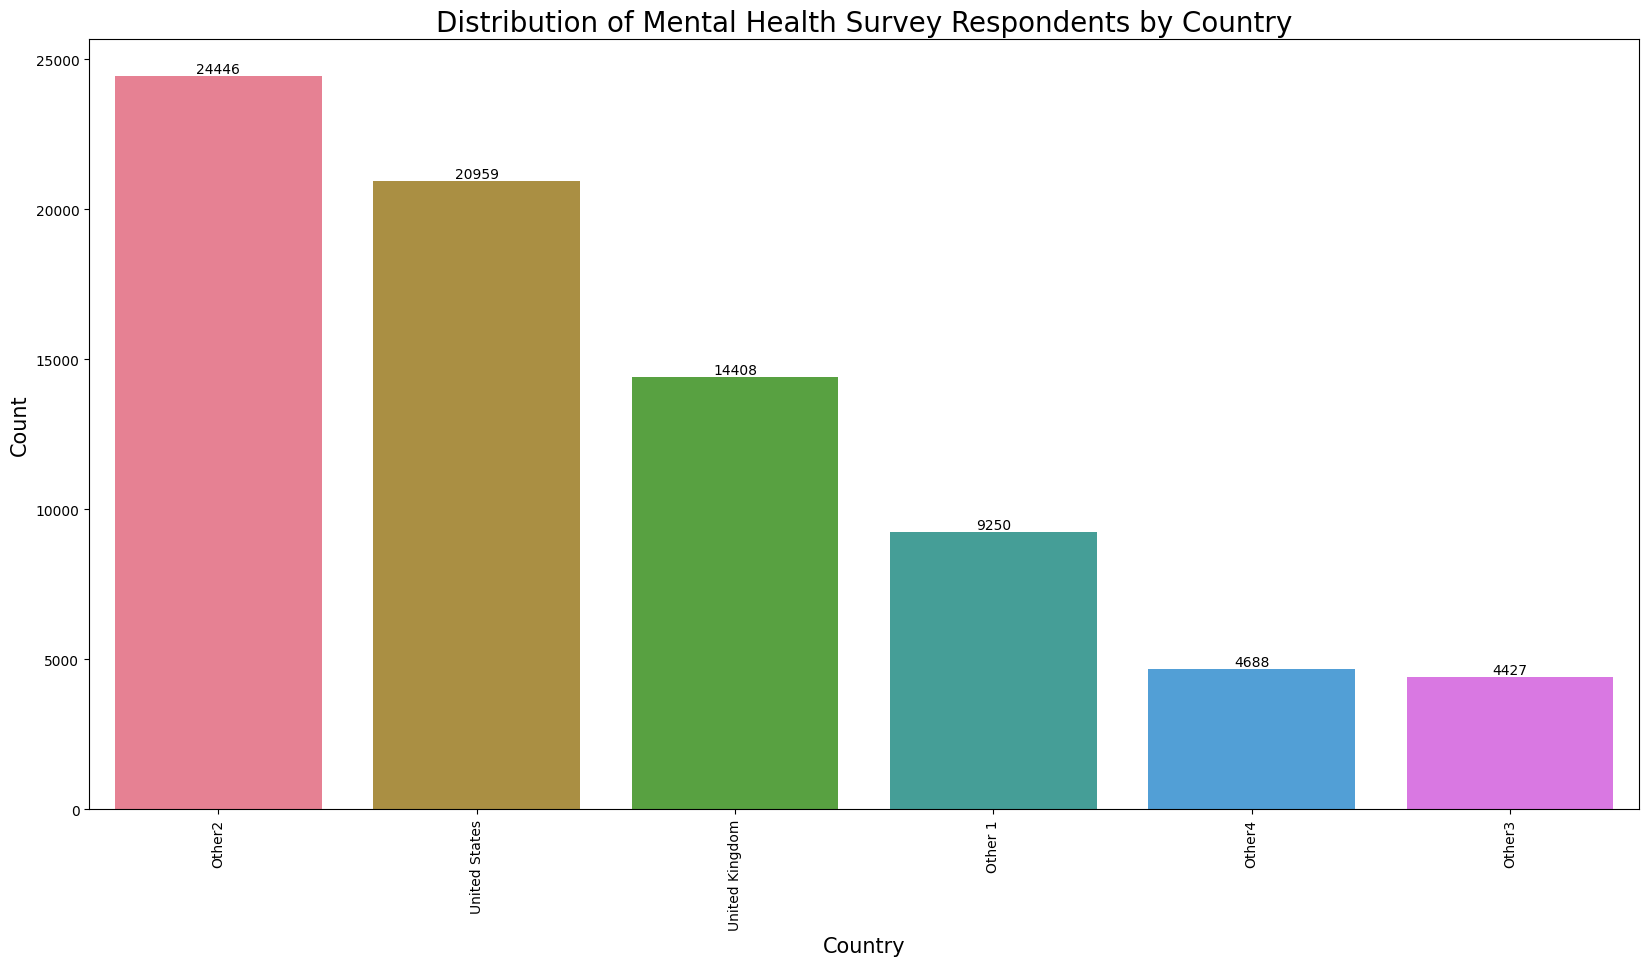

In [36]:
unique_countries = X_train['Country'].value_counts().index.tolist()
colors = sns.color_palette('husl', len(unique_countries))  # Or use 'Set3', 'tab20', etc.
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Country', data=X_train, order=unique_countries, palette=colors)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.set_title('Distribution of Mental Health Survey Respondents by Country', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(False)
plt.show()

In [37]:
# gender has imbalance but let's keep it since it's categorical later we can observe and change the values if needed
X_train['Gender'].value_counts()

Gender
Male      59896
Female    18282
Name: count, dtype: int64

In [38]:
X_train['Occupation'].value_counts()

Occupation
Housewife    17806
Student      16631
Corporate    16109
Others       14245
Business     13387
Name: count, dtype: int64

### Added after multiple algorithm application and checking in the front end prediction of a model I found bias on this field and applied this logic and got a better result, when I changed the value for this feature alone kept all the parameter made the model predict unexpected and different predictions. Once grouped into bins - it behaved almost correct.

### cleaning days_indooer due to imbalance

In [27]:
def bin_days(val):
    if val < -1:
        return 0
    elif val==-1:
        return 0
    elif val <= 14 :
        return 0
    elif val <= 45:
        return 1
    elif val <= 80:
        return 2
    else:
        return 3

In [28]:
X_train['Days_Indoors'] = X_train['Days_Indoors'].apply(bin_days)

In [29]:
X_test['Days_Indoors'] = X_test['Days_Indoors'].apply(bin_days)

In [30]:
X_train

,Gender,Country,Occupation,self_employed,family_history,past_treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
153771,Male,Other2,Others,No,Yes,No,3,Maybe,Yes,Yes,No,No,No,No,No
267742,Male,Other4,Housewife,No,No,No,0,No,Yes,No,Yes,No,Yes,No,No
97384,Male,United Kingdom,Others,No,Yes,No,0,No,No,Yes,No,Maybe,No,Maybe,Not sure
278838,Male,Other 1,Business,NaN,No,No,2,No,No,Maybe,Yes,No,No,Maybe,No
247270,Male,Other2,Student,Yes,No,Yes,0,Yes,Yes,No,No,Maybe,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227479,Male,Other3,Business,No,No,No,0,Yes,Maybe,Yes,No,Yes,Yes,No,Not sure
202587,Male,United States,Business,No,No,Yes,0,No,Maybe,Yes,No,No,Yes,No,No
244981,Male,Other2,Business,Yes,No,Yes,2,No,No,No,Yes,No,No,No,Yes
227913,Male,Other2,Corporate,No,No,No,0,Yes,Yes,Yes,Yes,No,No,Maybe,No


In [31]:
X_test

,Gender,Country,Occupation,self_employed,family_history,past_treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
177855,Male,Other2,Student,No,No,Yes,3,Yes,Maybe,Yes,Yes,No,Maybe,No,No
132314,Male,Other2,Student,No,Yes,Yes,0,Maybe,Maybe,Yes,No,No,Maybe,Maybe,No
62981,Male,United States,Housewife,No,No,Yes,1,Yes,Maybe,No,No,Maybe,Yes,No,Yes
70910,Male,Other4,Business,No,No,Yes,3,Maybe,Maybe,Maybe,No,Maybe,No,Yes,Yes
71731,Male,Other2,Housewife,Yes,No,No,2,Maybe,No,Maybe,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,Female,Other2,Student,No,Yes,Yes,1,Yes,Maybe,Maybe,No,No,Maybe,No,Not sure
256770,Male,Other 1,Student,No,No,Yes,3,No,Maybe,Yes,Yes,Yes,Maybe,Maybe,No
45294,Female,United Kingdom,Housewife,No,No,Yes,1,No,Maybe,Maybe,Yes,Yes,No,No,Yes
264329,Male,Other2,Student,No,No,Yes,3,Maybe,Yes,Yes,No,No,Yes,No,Yes


In [32]:
# Consider below nominal categorical data columns for OneHotEncoding
onehotencoding_column=['Country','Occupation','Gender']

In [33]:
# these columns has values yes,no / yes,no,maybe -> Since it has clear order, limited fixed choises, easily ranked 
# it don't require complex encoding
yes_no_maybe_column=['self_employed','family_history','past_treatment','Coping_Struggles','Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Work_Interest','Social_Weakness', 'mental_health_interview', 'care_options']

In [34]:
# creating a column transformer
preprocesor=ColumnTransformer(
    transformers=[# these are for country, gender, occupation which has nominal avlues
                  ('Onehot_column_processing',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),onehotencoding_column),
                  # Ordinalencoding for yes/no/maybe columns
                  ('encoding',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),yes_no_maybe_column)],
                  # Since Days_Indoors columns we haven't processed here, we telling transformer to retain current value
                  remainder='passthrough')
                 

### ----------------------------------------------------------------------------------
## Testing of preprocessors and result evaluation  
 * Do not run during deployment -- test if you have concerns in encoding, imputation or scaling
### ----------------------------------------------------------------------------------

In [60]:
preprocesor.fit(X_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehot_column_processing',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Country', 'Occupation', 'Gender']),
                                ('encoding',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['self_employed', 'family_history',
                                  'past_treatment', 'Coping_Struggles',
                                  'Growing_Stress', 'Changes_Habits',
                                  'Mental_Health_History', 'Work_Interest',
                                  'Social_Weakness', 'mental_health_interview',
                                  'care_options'])])

In [28]:
X_train_transformed=preprocesor.transform(X_train)
X_test_transformed=preprocesor.transform(X_test)

In [29]:
# Get feature names from the preprocessor
feature_names = preprocesor.get_feature_names_out()
# converting to dataframe to check the values
df_train = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)

In [30]:
# converting to dataframe to check the values
df_test= pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

In [94]:
impute=IterativeImputer(random_state=0,max_iter=100)

In [ ]:
impute.fit(df_train)

In [88]:
df_train_impute=impute.transform(df_train)
df_test_impute=impute.transform(df_test)

In [95]:
# Get feature names from the preprocessor
feature_names = impute.get_feature_names_out()
# converting to dataframe to check the values
df_train_2 = pd.DataFrame(df_train_impute, columns=feature_names, index=X_train.index)
# converting to dataframe to check the values
df_test_2= pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

In [96]:
df_train_2['remainder__Days_Indoors']

89830     14.0
211301    65.0
181769    30.0
153434    14.0
268619    14.0
          ... 
167177    14.0
83301     14.0
18639     14.0
47530     14.0
244723    14.0
Name: remainder__Days_Indoors, Length: 173572, dtype: float64

In [97]:
df_train_2.isnull().sum()

Onehot_column_processing__Country_Canada            0
Onehot_column_processing__Country_Other 1           0
Onehot_column_processing__Country_Other2            0
Onehot_column_processing__Country_Other3            0
Onehot_column_processing__Country_Other4            0
Onehot_column_processing__Country_United Kingdom    0
Onehot_column_processing__Country_United States     0
Onehot_column_processing__Occupation_Business       0
Onehot_column_processing__Occupation_Corporate      0
Onehot_column_processing__Occupation_Housewife      0
Onehot_column_processing__Occupation_Others         0
Onehot_column_processing__Occupation_Student        0
Onehot_column_processing__Gender_Female             0
Onehot_column_processing__Gender_Male               0
encoding__self_employed                             0
encoding__family_history                            0
encoding__past_treatment                            0
encoding__Coping_Struggles                          0
encoding__Growing_Stress    

In [98]:
df_train_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Onehot_column_processing__Country_Canada,173572.0,0.083873,0.277198,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_Other 1,173572.0,0.078676,0.269234,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_Other2,173572.0,0.105069,0.306643,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_Other3,173572.0,0.021697,0.145693,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_Other4,173572.0,0.023472,0.151396,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_United Kingdom,173572.0,0.192013,0.393884,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Country_United States,173572.0,0.495201,0.499978,0.0,0.0,0.0,1.0,1.0
Onehot_column_processing__Occupation_Business,173572.0,0.171727,0.377144,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Occupation_Corporate,173572.0,0.206433,0.404746,0.0,0.0,0.0,0.0,1.0
Onehot_column_processing__Occupation_Housewife,173572.0,0.229559,0.420550,0.0,0.0,0.0,0.0,1.0


### ------------------------------------- Testing end ------------------------------------------

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Creating the pipeline here for each model

In [37]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression())  
])

### ---------------------------------Modeling for LogisticRegression---------------------------

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# initialize the Logistic Regression Model - base model to develop the initial model
logReg = LogisticRegression(
    penalty='l2',        # Regularization type: 'l1', 'l2', 'elasticnet', 'none'
    C=1.0,               # Inverse of regularization strength (smaller C means stronger regularization)
    solver='lbfgs',      # Algorithm to use for optimization. Common choices: 'lbfgs', 'liblinear', 'saga'
    max_iter=1000,       # Maximum number of iterations for the solver to converge
    multi_class='multinomial',  # Strategy for multi-class problems: 'auto', 'ovr' (one-vs-rest), 'multinomial'
    random_state=42,     # For reproducibility
    n_jobs=None          # Number of CPU cores to use. None means 1 unless in a parallel setting. -1 for all cores (only with 'saga' solver for multiclass)
)

In [49]:
full_pipeline.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier', LogisticRegression())])

In [50]:
y_pred=full_pipeline.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.4255819902788437

### Completed -- 

### Tuning for LogisticRegression

In [199]:
params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs'],
    'classifier__max_iter': [100, 200, 500,1000,1500,2000]
}

In [200]:
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessor', 'imputer', 'scaler', 'classifier', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__Onehot_column_processing', 'preprocessor__encoding', 'preprocessor__Onehot_column_processing__categories', 'preprocessor__Onehot_column_processing__drop', 'preprocessor__Onehot_column_processing__dtype', 'preprocessor__Onehot_column_processing__feature_name_combiner', 'preprocessor__Onehot_column_processing__handle_unknown', 'preprocessor__Onehot_column_processing__max_categories', 'preprocessor__Onehot_column_processing__min_frequency', 'preprocessor__Onehot_column_processing__sparse_output', 'preprocessor__encoding__categories', 'preprocessor__encoding__dtype', 'preprocessor__encoding__encoded_missing_v

In [201]:
grid_search = GridSearchCV(estimator=full_pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot_column_processing',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Occupation',
                                                                          'Gender']),
                                                                        ('encoding',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['self_employed',
                                                                          'family_history...
                                                                          'mental_health_interview',
                                                                          'care_options'])])),
                                       ('imputer',
                                        IterativeImputer(max_iter=100,
                                                         random_state=0)),
                                       ('scaler', RobustScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__max_iter': [100, 200, 500, 1000, 1500,
                                                  2000],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']},
             scoring='accuracy', verbose=2)

In [202]:
grid_search.best_score_

np.float64(0.42117982470241816)

In [203]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.45      0.34      0.39      6124
         Low       0.41      0.43      0.42      6672
      Medium       0.43      0.51      0.46      6749

    accuracy                           0.43     19545
   macro avg       0.43      0.42      0.42     19545
weighted avg       0.43      0.43      0.42     19545



### -------------------------------------Modeling for Random forest--------------------------------

In [52]:
# Model training with random forest
# Initialize the RandomForestClassifier with key parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    max_features='sqrt',      # Number of features to consider for best split
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=5,      # Minimum number of samples required to split an internal node
    min_samples_leaf=3,       # Minimum number of samples required to be at a leaf node
    bootstrap=True,           # Whether bootstrap samples are used when building trees (default True)
    oob_score=True,           # Whether to use out-of-bag samples to estimate the generalization error
    random_state=42,          # For reproducibility of results
    n_jobs=-1                 # Use all available CPU cores for parallel processing (optional)
)


In [53]:
full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', rf_classifier)  # You can replace this with any other model
])

In [54]:
full_pipeline_rf.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_S...
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                        min_samples_split=5, n_jobs=-1,
                                        oob_score=True, random_state=42))])

In [55]:
y_pred=full_pipeline_rf.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9696597595292914

### Tuning Random forest

In [57]:
params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['sqrt', 'log2', 0.5],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [58]:
grid_search = GridSearchCV(estimator=full_pipeline_rf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)


In [ ]:
grid_search.fit(X_train, y_train)

In [170]:
grid_search.best_score_

np.float64(0.9768605154865122)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      0.96      0.97      6124
         Low       0.97      0.99      0.98      6672
      Medium       0.97      0.97      0.97      6749

    accuracy                           0.98     19545
   macro avg       0.98      0.97      0.98     19545
weighted avg       0.98      0.98      0.98     19545



In [ ]:
best_model=grid_search.best_estimator_

### ----------------------------------Modeling HistGradientBoosting--------------------------------

In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [61]:
hgb_classifier = HistGradientBoostingClassifier(
    learning_rate=0.1,         # Controls the step size at each iteration
    max_iter=100,              # Maximum number of boosting iterations (trees)
    max_leaf_nodes=31,         # Maximum number of leaves for each tree (controls complexity)
    # max_depth=None,          # Can be used instead of max_leaf_nodes, but often less effective for HGBoost
    min_samples_leaf=20,       # Minimum number of samples required to be at a leaf node
    l2_regularization=0.0,     # L2 regularization to prevent overfitting
    early_stopping='auto',     # Whether to use early stopping based on validation score
    # scoring='loss',          # Metric to use for early stopping ('loss' or 'accuracy'/'roc_auc'/etc.)
    # n_iter_no_change=10,     # Number of iterations with no improvement to wait for early stopping
    random_state=42,           # For reproducibility of results
    # verbose=0,               # Controls verbosity of the output during fitting
)

In [62]:
full_pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', hgb_classifier)  # You can replace this with any other model
])

In [63]:
full_pipeline_hgb.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [64]:
y_pred=full_pipeline_hgb.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.9759017651573293

### ---------------- tried with SMOTE pipeline -----------------------------------------

In [67]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline_hgb = ImbPipeline(steps=[
    ('preprocessor', preprocesor),        # encoding + imputation
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('smote', SMOTE(random_state=42)),     # apply only to training set----------------------Added SMOTE
    ('scaler', RobustScaler()),            # scaling after SMOTE
    ('classifier', hgb_classifier)
])

In [68]:
# Fit the pipeline (SMOTE applies only inside training)
smote_pipeline_hgb.fit(X_train, y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('smote', SMOTE(random_state=42)), ('scaler', RobustScaler()),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [69]:
# Evaluate on original test set
y_pred = smote_pipeline_hgb.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred)

0.9743156817600409

### Export the best model for streamlit application and test the model after fine tuning

### Tuning HistGradientBoostingClassifier 

In [71]:
params = {
    'classifier__learning_rate': [0.1, 0.05], # Step size shrinkage
    'classifier__max_iter': [100, 200],          # Number of boosting rounds (trees)
    'classifier__max_leaf_nodes': [15, 31,None],       # Max leaves per tree (alternative to max_depth)
    # 'classifier__max_depth': [None, 5, 10],         # You can use max_depth instead of max_leaf_nodes, but generally not both
    'classifier__min_samples_leaf': [10, 20, 40],     # Minimum samples required to be at a leaf node
    'classifier__l2_regularization': [0.0, 0.1, 1.0,10.0], # L2 regularization term
    # 'classifier__early_stopping': [True],           # Often good to include, but makes n_iter_no_change relevant
    # 'classifier__n_iter_no_change': [10, 20],       # Number of iterations without improvement for early stopping
}

In [74]:

grid_search_hgb = GridSearchCV(
    estimator=smote_pipeline_hgb,
    param_grid=params,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Metric to optimize (e.g., 'accuracy', 'f1_weighted', 'roc_auc')
    n_jobs=-1,             # Use all available CPU cores for parallel processing
    verbose=2              # Controls the verbosity: 0 = silent, 1 = fitted, 2 = all
)

In [75]:
# Fit the GridSearchCV to your training data
grid_search_hgb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot_column_processing',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country',
                                                                          'Occupation',
                                                                          'Gender']),
                                                                        ('encoding',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['self_employed',
                                                                          'family_history...
                                       ('scaler', RobustScaler()),
                                       ('classifier',
                                        HistGradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0.0, 0.1, 1.0, 10.0],
                         'classifier__learning_rate': [0.1, 0.05],
                         'classifier__max_iter': [100, 200],
                         'classifier__max_leaf_nodes': [15, 31, None],
                         'classifier__min_samples_leaf': [10, 20, 40]},
             scoring='accuracy', verbose=2)

In [76]:
grid_search_hgb.best_score_

np.float64(0.9753383371608146)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.96      0.98      0.97      6124
         Low       0.97      1.00      0.98      6672
      Medium       0.99      0.95      0.97      6749

    accuracy                           0.97     19545
   macro avg       0.97      0.97      0.97     19545
weighted avg       0.97      0.97      0.97     19545



### Exporting the best_estimater model and tested in the streamlit front end model prediction application

In [78]:
import joblib
joblib.dump(smote_pipeline, 'model.pkl')

['model.pkl']

### ----------------------------------- Modeling Adaboost ----------------------------

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Initialize AdaBoostClassifier with key parameters
# AdaBoost typically uses a weak learner, often a DecisionTreeClassifier with shallow depth
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # The base estimator (weak learner), often a shallow tree (stump)
    n_estimators=50,             # Maximum number of estimators (trees) to boost
    learning_rate=1.0,           # Controls the contribution of each estimator
    random_state=42,             # For reproducibility of results
    # algorithm='SAMME.R',       # Algorithm used for AdaBoost (SAMME.R for real valued, SAMME for discrete)
)

In [116]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', ada_classifier)  # You can replace this with any other model
])

In [117]:
full_pipeline.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    random_state=42))])

In [118]:
y_pred=full_pipeline.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.42389357892044

### ------------------------------------ Modeling LinearSVC ------------------------------

In [120]:
from sklearn.svm import LinearSVC

# Initialize LinearSVC with key parameters
linear_svc_classifier = LinearSVC(
    penalty='l2',              # The norm used in the penalization (L1 or L2)
    loss='squared_hinge',      # The loss function to be used (hinge or squared_hinge)
    dual=True,                 # Choose between primal (False) and dual (True) formulation
                               # `dual=True` is default when n_samples > n_features, else `dual=False`
                               # For n_samples > n_features, set `dual=False` for faster training.
    C=1.0,                     # Regularization parameter. Smaller values specify stronger regularization.
    tol=1e-4,                  # Tolerance for stopping criteria
    max_iter=1000,             # Maximum number of iterations taken for the solvers to converge
    random_state=42,           # For reproducibility of results
)

In [121]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', linear_svc_classifier)  # You can replace this with any other model
])

In [123]:
full_pipeline.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier', LinearSVC(dual=True, random_state=42))])

In [124]:
y_pred=full_pipeline.predict(X_test)

In [125]:
accuracy_score(y_test,y_pred)

0.42696341775390123

### ------------------------- Modeling GradientBoostingClassifier -----------------------------

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier with key parameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,           # Number of boosting stages (trees) to perform
    learning_rate=0.1,          # Shrinks the contribution of each tree
    max_depth=3,                # Maximum depth of the individual regression estimators
    min_samples_split=2,        # Minimum number of samples required to split an internal node
    min_samples_leaf=1,         # Minimum number of samples required to be at a leaf node
    subsample=1.0,              # Fraction of samples to be used for fitting the individual base learners.
                                # Values less than 1.0 make the fit more robust to overfitting.
    max_features=None,          # Number of features to consider when looking for the best split
    random_state=42,            # For reproducibility of results
    # loss='log_loss',          # Loss function to be optimized ('log_loss' for classification)
    # criterion='friedman_mse', # Function to measure the quality of a split
    # tol=1e-4,                 # Tolerance for the stopping criterion
    # ccp_alpha=0.0,            # Complexity parameter used for Minimal Cost-Complexity Pruning
)

In [127]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100)),
    ('scaler', RobustScaler()),
    ('classifier', gb_classifier)  # You can replace this with any other model
])

In [128]:
full_pipeline.fit(X_train,y_train)

C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot_column_processing',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Occupation',
                                                   'Gender']),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['self_employed',
                                                   'family_history',
                                                   'past_treatment',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('imputer', IterativeImputer(max_iter=100, random_state=0)),
                ('scaler', RobustScaler()),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [129]:
y_pred=full_pipeline.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred)

0.6476848298797646

In [229]:
param_grid = {
    'imputer__max_iter': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_leaf_nodes': [20, 30]
}

In [226]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [230]:
random_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Try 50 random combinations
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2   # Show progress
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler

print("Starting Randomized .........")
random_search.fit(X_train, y_train)
print("Randomized Search complete.")

Starting Randomized .........
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\sruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
